In [2]:
from services.StockService import StockService
%matplotlib notebook 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [8]:

# filename = 'GOOG-year.csv'
# filename = 'GOOG.csv'
# df = pd.read_csv(f'../dataset/{filename}')

df = StockService.get_stock_from_datestrings('hd', '2007-01-01', '2018-01-01')

df.head()

        ticker        date    open    high     low   Close     volume  \
2376204     HD  2017-12-29  190.74  190.74  189.53  189.53  4607719.0   
2382625     HD  2017-12-28  190.91  190.98  189.64  189.78  3175631.0   
2389049     HD  2017-12-27  190.60  191.49  190.01  190.19  5347377.0   
2395475     HD  2017-12-26  188.53  190.42  188.34  190.36  2879194.0   
2401901     HD  2017-12-22  188.20  188.46  187.27  188.13  3104351.0   

         dividends  closeunadj lastupdated  
2376204        0.0      189.53  2017-12-29  
2382625        0.0      189.78  2017-12-29  
2389049        0.0      190.19  2017-12-27  
2395475        0.0      190.36  2017-12-26  
2401901        0.0      188.13  2017-12-22  


,ticker,date,open,high,low,Close,volume,dividends,closeunadj,lastupdated
2376204,HD,2017-12-29,190.74,190.74,189.53,189.53,4607719.0,0.0,189.53,2017-12-29
2382625,HD,2017-12-28,190.91,190.98,189.64,189.78,3175631.0,0.0,189.78,2017-12-29
2389049,HD,2017-12-27,190.60,191.49,190.01,190.19,5347377.0,0.0,190.19,2017-12-27
2395475,HD,2017-12-26,188.53,190.42,188.34,190.36,2879194.0,0.0,190.36,2017-12-26
2401901,HD,2017-12-22,188.20,188.46,187.27,188.13,3104351.0,0.0,188.13,2017-12-22


In [9]:
count = int(np.ceil(len(df) * 0.1))
signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0
signals['trend'] = df['Close']
signals['RollingMax'] = (signals.trend.shift(1).rolling(count).max())
signals['RollingMin'] = (signals.trend.shift(1).rolling(count).min())
signals.loc[signals['RollingMax'] < signals.trend, 'signal'] = -1
signals.loc[signals['RollingMin'] > signals.trend, 'signal'] = 1
signals

,signal,trend,RollingMax,RollingMin
2376204,0.0,189.53,NaN,NaN
2382625,0.0,189.78,NaN,NaN
2389049,0.0,190.19,NaN,NaN
2395475,0.0,190.36,NaN,NaN
2401901,0.0,188.13,NaN,NaN
2408332,0.0,188.08,NaN,NaN
2414762,0.0,187.31,NaN,NaN
2421190,0.0,185.98,NaN,NaN
2427620,0.0,184.73,NaN,NaN
2434050,0.0,182.58,NaN,NaN


In [10]:
def buy_stock(
    real_movement,
    signal,
    initial_money = 10000,
    max_buy = 1,
    max_sell = 1,
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell
    initial_money = 1000, ignore what kind of currency
    max_buy = max quantity for share to buy
    max_sell = max quantity for share to sell
    """
    starting_money = initial_money
    states_sell = []
    states_buy = []
    current_inventory = 0

    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i]
        if shares < 1:
            print(
                'day %d: total balances %f, not enough money to buy a unit price %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'day %d: buy %d units at price %f, total balance %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory

    for i in range(real_movement.shape[0] - int(0.025 * len(df))):
        state = signal[i]
        if state == 1:
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)
        elif state == -1:
            if current_inventory == 0:
                    print('day %d: cannot sell anything, inventory 0' % (i))
            else:
                if current_inventory > max_sell:
                    sell_units = max_sell
                else:
                    sell_units = current_inventory
                current_inventory -= sell_units
                total_sell = sell_units * real_movement[i]
                initial_money += total_sell
                try:
                    invest = (
                        (real_movement[i] - real_movement[states_buy[-1]])
                        / real_movement[states_buy[-1]]
                    ) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (i, sell_units, total_sell, invest, initial_money)
                )
            states_sell.append(i)
            
    invest = ((initial_money - starting_money) / starting_money) * 100
    total_gains = initial_money - starting_money
    return states_buy, states_sell, total_gains, invest

In [11]:
states_buy, states_sell, total_gains, invest = buy_stock(df.Close, signals['signal'])

day 227: buy 1 units at price 136.490000, total balance 9863.510000
day 238: buy 1 units at price 135.600000, total balance 9727.910000
day 239: buy 1 units at price 135.390000, total balance 9592.520000
day 242: buy 1 units at price 135.040000, total balance 9457.480000
day 246: buy 1 units at price 134.310000, total balance 9323.170000
day 247: buy 1 units at price 133.530000, total balance 9189.640000
day 265: buy 1 units at price 133.390000, total balance 9056.250000
day 266: buy 1 units at price 132.530000, total balance 8923.720000
day 267: buy 1 units at price 132.460000, total balance 8791.260000
day 268: buy 1 units at price 128.740000, total balance 8662.520000
day 278: buy 1 units at price 128.220000, total balance 8534.300000
day 281: buy 1 units at price 125.330000, total balance 8408.970000
day 282: buy 1 units at price 124.400000, total balance 8284.570000
day 287: buy 1 units at price 124.250000, total balance 8160.320000
day 288: buy 1 units at price 123.750000, total 

<IPython.core.display.Javascript object>


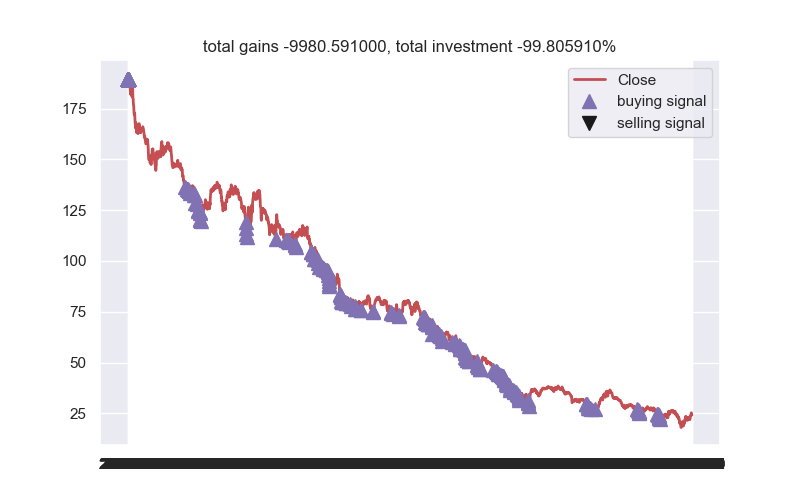

In [12]:
close = df['Close']
fig = plt.figure(figsize = (8,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()